## Import


In [45]:
! pip install pandas numpy


import pandas as pd
import numpy as np

import os

## File Loading


In [48]:
SEEDS = ['actor', 
         'amusement_park', 
         'band', 
         'championship', 
         'chemical_element', 
         'company', 
         'comune', 
         'dialect', 
         'film', 
         'scientist', 
         'sculpture', 
         'university', 
         'vehicle', 
         'video_game']


SIZES = [2,3,4,5,6]

In [49]:
# read the names of the subfolders in experiments

print(os.listdir('../24-09-13'))

merged = None


for seed in SEEDS:
    for size in SIZES:
        _tmp = pd.read_csv(f'../24-09-13/{seed}/{size}.csv', sep=';')
        if merged is None:
            merged = _tmp
        else:
            merged = pd.concat([merged, _tmp])

# drop the "Unnamed: 15" column
merged = merged.drop('Unnamed: 20', axis=1)

print(merged.columns) 
print(merged.shape)

        



['university', 'company', 'comune', 'amusement_park', 'film', 'vehicle', 'chemical_element', 'scientist', 'video_game', 'championship', 'actor', 'sculpture', 'dialect', 'band']
Index(['SEED', 'UNIT', 'UNIT_SIZE', 'SUMMARY_SIZES', 'WT_SUMMARY_SIZES',
       'SUMMARY_TILDE_SIZES', 'OLDKER_SIZE', 'WT_OLDKER_SIZE', 'NEWKER_SIZE',
       'WT_NEWKER_SIZE', 'OLDCORE_SIZE', 'WT_OLDCORE_SIZE', 'NEWCORE_SIZE',
       'WT_NEWCORE_SIZE', 'SUMMARY_COMPUTATION_TIME',
       'SUMMARY_TILDE_COMPUTATION_TIME', 'OLDKER_COMPUTATION_TIME',
       'NEWKER_COMPUTATION_TIME', 'OLDCORE_COMPUTATION_TIME',
       'NEWCORE_COMPUTATION_TIME'],
      dtype='object')
(700000, 20)


In [50]:
# print the types of all columns

print(merged.dtypes)

SEED                               object
UNIT                               object
UNIT_SIZE                           int64
SUMMARY_SIZES                      object
WT_SUMMARY_SIZES                   object
SUMMARY_TILDE_SIZES                object
OLDKER_SIZE                        object
WT_OLDKER_SIZE                     object
NEWKER_SIZE                         int64
WT_NEWKER_SIZE                      int64
OLDCORE_SIZE                      float64
WT_OLDCORE_SIZE                   float64
NEWCORE_SIZE                        int64
WT_NEWCORE_SIZE                     int64
SUMMARY_COMPUTATION_TIME          float64
SUMMARY_TILDE_COMPUTATION_TIME    float64
OLDKER_COMPUTATION_TIME            object
NEWKER_COMPUTATION_TIME           float64
OLDCORE_COMPUTATION_TIME          float64
NEWCORE_COMPUTATION_TIME          float64
dtype: object


In [54]:
timeouts = merged[merged['OLDKER_COMPUTATION_TIME'] != 'TIMEOUT']

In [55]:
# remove the rows with "TIMEOUT" in "OLDKER_COMPUTATION_TIME"

merged = merged[merged['OLDKER_COMPUTATION_TIME'] != 'TIMEOUT']

In [56]:
timeouts

,SEED,UNIT,UNIT_SIZE,SUMMARY_SIZES,WT_SUMMARY_SIZES,SUMMARY_TILDE_SIZES,OLDKER_SIZE,WT_OLDKER_SIZE,NEWKER_SIZE,WT_NEWKER_SIZE,OLDCORE_SIZE,WT_OLDCORE_SIZE,NEWCORE_SIZE,WT_NEWCORE_SIZE,SUMMARY_COMPUTATION_TIME,SUMMARY_TILDE_COMPUTATION_TIME,OLDKER_COMPUTATION_TIME,NEWKER_COMPUTATION_TIME,OLDCORE_COMPUTATION_TIME,NEWCORE_COMPUTATION_TIME
0,actor,"bn:00915979n,bn:02426205n",2,"260,265","519,528","6,12",4,8,4,8,NaN,NaN,255,510,18.28718,166.27281,4.50687,0.47434,NaN,31.17181
1,actor,"bn:15939213n,bn:05144812n",2,"257,256","512,512","5,5",4,9,4,9,NaN,NaN,255,511,13.63076,159.66753,2.48905,0.30096,NaN,11.97854
2,actor,"bn:02688185n,bn:05472498n",2,"260,256","519,511","8,5",5,10,5,10,NaN,NaN,256,512,17.72649,165.66927,2.10095,0.36817,NaN,13.64912
3,actor,"bn:08476136n,bn:03875359n",2,"255,258","510,515","4,7",4,9,4,9,NaN,NaN,255,511,16.19932,165.23915,1.68649,0.30547,NaN,12.06613
4,actor,"bn:03340439n,bn:02366938n",2,"259,270","517,538","8,10",6,12,6,12,NaN,NaN,257,514,14.90042,163.00551,15.89545,0.53593,NaN,11.95503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,video_game,"bn:14680116n,bn:15167827n,bn:02922669n,bn:0285...",6,"159,151,161,161,163,160","318,302,322,322,326,320","9,1,6,5,13,9",1,3,1,3,NaN,NaN,151,303,30.99152,53.39288,0.08591,1.08446,NaN,37.02958
9996,video_game,"bn:14400546n,bn:21289459n,bn:00766180n,bn:0297...",6,"160,154,168,160,156,161","319,308,335,319,312,322","9,4,18,10,6,5",2,5,2,5,NaN,NaN,152,305,42.13533,62.79648,4.91851,1.46194,NaN,31.53840
9997,video_game,"bn:00163243n,bn:01802600n,bn:01178985n,bn:1387...",6,"165,158,153,152,156,185","330,316,306,304,312,370","15,8,3,2,6,4",1,3,1,3,NaN,NaN,151,303,54.53325,57.14554,0.0837,1.00288,NaN,32.76456
9998,video_game,"bn:13905103n,bn:16848904n,bn:01599502n,bn:0054...",6,"152,151,159,158,163,157","304,302,317,316,325,314","2,1,9,8,12,7",1,3,1,3,NaN,NaN,151,303,35.64004,56.67127,0.86137,1.02951,NaN,30.00838


In [57]:
# create the column "OLDKER_COMPUTATION_TIME_FIX" from "OLDKER" the column has to be of type float64

merged['OLDKER_COMPUTATION_TIME_FIX'] = merged['OLDKER_COMPUTATION_TIME'].astype('float64')

In [58]:
merged['OLDKER_SIZE_FIX'] = merged['OLDKER_SIZE'].astype('int64')

In [59]:
print(merged.dtypes)

SEED                               object
UNIT                               object
UNIT_SIZE                           int64
SUMMARY_SIZES                      object
WT_SUMMARY_SIZES                   object
SUMMARY_TILDE_SIZES                object
OLDKER_SIZE                        object
WT_OLDKER_SIZE                     object
NEWKER_SIZE                         int64
WT_NEWKER_SIZE                      int64
OLDCORE_SIZE                      float64
WT_OLDCORE_SIZE                   float64
NEWCORE_SIZE                        int64
WT_NEWCORE_SIZE                     int64
SUMMARY_COMPUTATION_TIME          float64
SUMMARY_TILDE_COMPUTATION_TIME    float64
OLDKER_COMPUTATION_TIME            object
NEWKER_COMPUTATION_TIME           float64
OLDCORE_COMPUTATION_TIME          float64
NEWCORE_COMPUTATION_TIME          float64
OLDKER_COMPUTATION_TIME_FIX       float64
OLDKER_SIZE_FIX                     int64
dtype: object


In [60]:
# PRINT the shape of the dataframe  

print(merged.shape)

(699977, 22)


In [61]:
# drop the column "OLDKER_COMPUTATION_TIME"

merged = merged.drop('OLDKER_COMPUTATION_TIME', axis=1)
merged = merged.drop('OLDKER_SIZE', axis=1)

In [62]:
# drop the columns "OLDCORE_SIZE" and "OLDCORE_COMPUTATION_TIME"

merged = merged.drop('OLDCORE_SIZE', axis=1)
merged = merged.drop('OLDCORE_COMPUTATION_TIME', axis=1)

In [63]:
# create the column "SUMMARY_OLDKER_COMPUTATION_TIME" as the sum of "OLDKER_COMPUTATION_TIME_FIX" and "SUMMARY_TILDE_COMPUTATION_TIME"

merged['SUMMARY_OLDKER_COMPUTATION_TIME'] = merged['OLDKER_COMPUTATION_TIME_FIX'] + merged['SUMMARY_TILDE_COMPUTATION_TIME']


In [64]:
# print the max of "SUMMARY_OLDKER_COMPUTATION_TIME"

print(merged['SUMMARY_OLDKER_COMPUTATION_TIME'].max())

59559.0483


In [65]:
# print the values of "OLDKER_COMPUTATION_TIME_FIX" and "SUMMARY_TILDE_COMPUTATION_TIME" corresponding to the max of "SUMMARY_OLDKER_COMPUTATION_TIME"

print(merged[merged['SUMMARY_OLDKER_COMPUTATION_TIME'] == merged['SUMMARY_OLDKER_COMPUTATION_TIME'].max()][['OLDKER_COMPUTATION_TIME_FIX', 'SUMMARY_TILDE_COMPUTATION_TIME']])

      OLDKER_COMPUTATION_TIME_FIX  SUMMARY_TILDE_COMPUTATION_TIME
4090                  59468.85897                        90.18933


In [66]:
# create the column "SUMMARY_NEWKER_COMPUTATION_TIME" as the sum of "NEWKER_COMPUTATION_TIME" and "SUMMARY_TILDE_COMPUTATION_TIME"

merged['SUMMARY_NEWKER_COMPUTATION_TIME'] = merged['NEWKER_COMPUTATION_TIME'] + merged['SUMMARY_TILDE_COMPUTATION_TIME']

In [67]:
# print the max of "SUMMARY_NEWKER_COMPUTATION_TIME"

print(merged['SUMMARY_NEWKER_COMPUTATION_TIME'].max())

718.92684


In [68]:
# print the values of "NEWKER_COMPUTATION_TIME" and "SUMMARY_TILDE_COMPUTATION_TIME" corresponding to the max of "SUMMARY_NEWKER_COMPUTATION_TIME"

print(merged[merged['SUMMARY_NEWKER_COMPUTATION_TIME'] == merged['SUMMARY_NEWKER_COMPUTATION_TIME'].max()][['NEWKER_COMPUTATION_TIME', 'SUMMARY_TILDE_COMPUTATION_TIME']])

      NEWKER_COMPUTATION_TIME  SUMMARY_TILDE_COMPUTATION_TIME
9931                  0.19759                       718.72925


In [69]:
# create the column "SUMMARY_NEWCORE_COMPUTATION_TIME" as the sum of "NEWCORE_COMPUTATION_TIME" and "SUMMARY_COMPUTATION_TIME"

merged['SUMMARY_NEWCORE_COMPUTATION_TIME'] = merged['NEWCORE_COMPUTATION_TIME'] + merged['SUMMARY_COMPUTATION_TIME']

In [70]:
# print the max of "SUMMARY_NEWCORE_COMPUTATION_TIME"

print(merged['SUMMARY_NEWCORE_COMPUTATION_TIME'].max())

815.25427


In [71]:
# print the values of "NEWCORE_COMPUTATION_TIME" and "SUMMARY_COMPUTATION_TIME" corresponding to the max of "SUMMARY_NEWCORE_COMPUTATION_TIME"

print(merged[merged['SUMMARY_NEWCORE_COMPUTATION_TIME'] == merged['SUMMARY_NEWCORE_COMPUTATION_TIME'].max()][['NEWCORE_COMPUTATION_TIME', 'SUMMARY_COMPUTATION_TIME']])

      NEWCORE_COMPUTATION_TIME  SUMMARY_COMPUTATION_TIME
8860                 781.40134                  33.85293


## Algorithm Correctness

### Timeout reporting:

In [72]:
# count the number of "TIMEOUT" in "OLDKER_SIZE" column
print(merged[merged['OLDKER_SIZE'] == 'TIMEOUT'].shape[0])

KeyError: 'OLDKER_SIZE'

In [6]:
# count the number of "TIMEOUT" in "NEWCORE_SIZE" column
print(merged[merged['NEWCORE_SIZE'] == 'TIMEOUT'].shape[0])

0


In [7]:
# count the number of "TIMEOUT" in "NEWKER_SIZE" column
print(merged[merged['NEWKER_SIZE'] == 'TIMEOUT'].shape[0])

0


In [79]:
# print the units with TIMEOUT in "OLDKER_SIZE"

timeout_df =merged[merged['OLDKER_SIZE'] == 'TIMEOUT']

# PROJECT TMP over the columns 'UNIT_SIZE', 'UNIT', 'SEED'

print(timeout_df[['UNIT_SIZE', 'UNIT', 'SEED']])


save_path = 'stats/timeout_df.csv'

timeout_df.to_csv(save_path, index=True)



      UNIT_SIZE                       UNIT              SEED
2762          2  bn:02402803n,bn:03446916n    amusement_park
3892          2  bn:03085743n,bn:02402803n    amusement_park
4760          2  bn:02402803n,bn:02898004n    amusement_park
8859          2  bn:03444592n,bn:03284442n    amusement_park
9220          2  bn:02402803n,bn:03444640n    amusement_park
9930          2  bn:01278444n,bn:03446933n    amusement_park
550           2  bn:02433103n,bn:00006908n  chemical_element
3636          2  bn:00006872n,bn:00049739n  chemical_element
7571          2  bn:00049739n,bn:00006881n  chemical_element
8613          2  bn:15586463n,bn:00006905n  chemical_element
3554          2  bn:16092513n,bn:15159811n              film
3659          2  bn:14496655n,bn:16572511n              film
6241          2  bn:03515773n,bn:05773657n              film
9160          2  bn:03756889n,bn:03745983n              film


In [80]:
# Check if whether there is no timeout, the output size of the two algorithms coincide.

_no_timeout = merged[(merged['OLDKER_SIZE'] != 'TIMEOUT') & (merged['NEWKER_SIZE'] != 'TIMEOUT')]

_no_timeout.loc[:, 'OLDKER_SIZE'] = _no_timeout.loc[:, 'OLDKER_SIZE'].astype(np.int64)


print((_no_timeout['OLDKER_SIZE'] == _no_timeout['NEWKER_SIZE']).all())

print(_no_timeout.shape[0])


True
699986


## Overall Size statistics

In [73]:
# Compute core/ker ratio

merged['CORE_KER_RATIO'] = merged['NEWCORE_SIZE'] / merged['NEWKER_SIZE']


In [94]:
# Compute statistics for the core/ker ratio

_tmp = merged['CORE_KER_RATIO'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

# print the statistics on file

print(_tmp)

save_path = 'stats/overall/core_ker_size_ratio_stats.csv'

_tmp.to_csv(save_path, index=True)


count    699977.000000
mean         73.212644
std          48.297863
min           3.285714
5%            9.500000
25%          40.000000
50%          60.000000
75%         121.000000
95%         161.000000
99%         195.000000
max         268.000000
Name: CORE_KER_RATIO, dtype: float64


In [93]:
# statistics for "KER"

_tmp = merged['NEWKER_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/overall/ker_size_stats.csv'
_tmp.to_csv(save_path, index=True)


count    699977.000000
mean          2.657266
std           1.978247
min           1.000000
5%            1.000000
25%           1.000000
50%           2.000000
75%           3.000000
95%           6.000000
99%           9.000000
max          29.000000
Name: NEWKER_SIZE, dtype: float64


In [92]:
# statistics for "CORE"

_tmp = merged['NEWCORE_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/overall/core_size_stats.csv'

_tmp.to_csv(save_path, index=True)


count    699977.000000
mean        143.406343
std          80.258405
min          18.000000
5%           35.000000
25%          86.000000
50%         127.000000
75%         192.000000
95%         314.000000
99%         314.000000
max         345.000000
Name: NEWCORE_SIZE, dtype: float64


## Grouped by cardinality and seed size statistics

In [80]:
# Core/Ker ratio for each "unit_size"

_tmp = merged.groupby('UNIT_SIZE')['CORE_KER_RATIO'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_size/core_ker_size_ratio.csv'

_tmp.to_csv(save_path, index=True)


              count       mean        std       min         5%        25%  \
UNIT_SIZE                                                                   
2          139984.0  61.932737  43.723181  3.285714   9.000000  33.000000   
3          140000.0  69.693693  47.161328  3.733333   9.000000  38.800000   
4          140000.0  74.645606  48.545289  3.733333  10.000000  42.166667   
5          140000.0  78.408711  49.356857  3.733333  11.666667  50.400000   
6          139993.0  81.381591  49.994056  4.363636  11.666667  51.200000   

                 50%         75%    95%    99%    max  
UNIT_SIZE                                              
2          52.333333   64.000000  151.0  195.0  268.0  
3          59.500000   84.666667  161.0  195.0  254.0  
4          62.000000  121.000000  161.0  195.0  254.0  
5          62.600000  121.000000  161.0  195.0  253.0  
6          63.500000  122.000000  161.0  195.0  252.0  


In [81]:
# Core/Ker ratio for each "seed"

_tmp = merged.groupby('SEED')['CORE_KER_RATIO'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_seed/core_ker_size_ratio.csv'

_tmp.to_csv(save_path, index=True)


                    count        mean        std        min         5%  \
SEED                                                                     
actor             50000.0   85.097022  45.346923  26.100000  51.200000   
amusement_park    49994.0   70.671613  27.144074   8.294118  40.000000   
band              50000.0   83.071552  31.244486  18.125000  41.666667   
championship      50000.0   87.693542  32.375529  15.222222  47.333333   
chemical_element  49996.0   26.703400   9.092686   3.500000  17.093750   
company           50000.0  142.149533  61.048406  23.222222  48.500000   
comune            50000.0   53.599131   5.683552  35.222222  52.333333   
dialect           50000.0  100.458998  29.522201  10.863636  54.333333   
film              49989.0   15.134133   9.404836   3.285714   6.333333   
scientist         50000.0   83.664947  43.826150  14.777778  36.285714   
sculpture         49998.0   22.228851  16.558436   3.714286   5.375000   
university        50000.0  115.580357 

In [83]:
# Core/Ker ratio for each "unit_size" and "seed"

_tmp = merged.groupby(['UNIT_SIZE', 'SEED'])['CORE_KER_RATIO'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_seed_and_size/core_ker_size_ratio.csv'

_tmp.to_csv(save_path, index=True)

                              count        mean        std        min  \
UNIT_SIZE SEED                                                          
2         actor             10000.0   67.106806  31.764083  26.100000   
          amusement_park     9994.0   60.700084  23.877044   8.294118   
          band              10000.0   67.718265  28.196042  18.125000   
          championship      10000.0   71.805402  29.978506  15.222222   
          chemical_element   9996.0   24.453151   9.602260   3.500000   
...                             ...         ...        ...        ...   
6         scientist         10000.0  103.240601  42.207077  31.875000   
          sculpture          9998.0   18.586286  13.313449   4.363636   
          university        10000.0  129.277900  24.414014  47.000000   
          vehicle           10000.0   57.722104   4.325985   7.823529   
          video_game        10000.0  104.638929  48.035440  22.428571   

                                   5%         25% 

In [84]:
# Core size by "unit_size"

_tmp = merged.groupby('UNIT_SIZE')['NEWCORE_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_size/core_size.csv'

_tmp.to_csv(save_path, index=True)


              count        mean        std   min    5%    25%    50%    75%  \
UNIT_SIZE                                                                     
2          139984.0  149.946458  78.458885  18.0  37.0  118.0  133.0  195.0   
3          140000.0  144.515929  79.925789  18.0  36.0   86.0  127.0  195.0   
4          140000.0  142.162971  80.616371  18.0  35.0   85.0  126.0  192.0   
5          140000.0  140.747757  80.861059  18.0  35.0   82.0  126.0  192.0   
6          139993.0  139.659162  80.988407  18.0  34.0   59.0  126.0  192.0   

             95%    99%    max  
UNIT_SIZE                       
2          314.0  314.0  345.0  
3          314.0  314.0  339.0  
4          314.0  314.0  315.0  
5          314.0  314.0  315.0  
6          314.0  314.0  315.0  


In [85]:
# Core size by "seed"

_tmp = merged.groupby('SEED')['NEWCORE_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_seed/core_size.csv'

_tmp.to_csv(save_path, index=True)

                    count        mean        std    min     5%    25%    50%  \
SEED                                                                           
actor             50000.0  254.518840   1.194535  252.0  252.0  254.0  255.0   
amusement_park    49994.0  119.265512   5.831431  118.0  118.0  119.0  119.0   
band              50000.0  123.444520   2.779704  122.0  122.0  122.0  124.0   
championship      50000.0  127.770200   7.617107  126.0  126.0  126.0  127.0   
chemical_element  49996.0   44.203916  19.936316   36.0   36.0   37.0   38.0   
company           50000.0  192.007120  14.124459  163.0  163.0  192.0  195.0   
comune            50000.0  313.902740   0.473334  310.0  313.0  314.0  314.0   
dialect           50000.0  134.466420  20.009618  121.0  121.0  121.0  121.0   
film              49989.0   39.088519  20.165378   33.0   33.0   34.0   35.0   
scientist         50000.0  234.205520  36.025334  161.0  161.0  249.0  251.0   
sculpture         49998.0   70.468499  3

In [86]:
# Core size by "unit_size" and "seed"

_tmp = merged.groupby(['UNIT_SIZE', 'SEED'])['NEWCORE_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_seed_and_size/core_size.csv'

_tmp.to_csv(save_path, index=True)

                              count        mean        std    min     5%  \
UNIT_SIZE SEED                                                             
2         actor             10000.0  255.301900   1.353713  252.0  253.0   
          amusement_park     9994.0  120.830999  12.330052  118.0  118.0   
          band              10000.0  124.447100   5.532745  122.0  122.0   
          championship      10000.0  131.267100  15.066674  126.0  126.0   
          chemical_element   9996.0   58.981993  33.336919   36.0   36.0   
...                             ...         ...        ...    ...    ...   
6         scientist         10000.0  225.147100  40.243641  161.0  161.0   
          sculpture          9998.0   57.491598  26.988320   18.0   18.0   
          university        10000.0  139.147100   0.379573  139.0  139.0   
          vehicle           10000.0   58.388500   3.112288   58.0   58.0   
          video_game        10000.0  151.957700   1.195347  151.0  151.0   

           

In [87]:
# Ker size by "unit_size"

_tmp = merged.groupby('UNIT_SIZE')['NEWKER_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_size/ker_size.csv'

_tmp.to_csv(save_path, index=True)


              count      mean       std  min   5%  25%  50%  75%  95%   99%  \
UNIT_SIZE                                                                     
2          139984.0  3.315265  2.324771  1.0  1.0  2.0  3.0  5.0  7.0  10.0   
3          140000.0  2.801043  1.998771  1.0  1.0  1.0  2.0  4.0  6.0   9.0   
4          140000.0  2.539893  1.838471  1.0  1.0  1.0  2.0  3.0  6.0   8.0   
5          140000.0  2.375621  1.767301  1.0  1.0  1.0  2.0  3.0  6.0   8.0   
6          139993.0  2.254563  1.719221  1.0  1.0  1.0  2.0  3.0  6.0   8.0   

            max  
UNIT_SIZE        
2          29.0  
3          26.0  
4          23.0  
5          21.0  
6          18.0  


In [88]:
# ker size by "seed"

_tmp = merged.groupby('SEED')['NEWKER_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_seed/ker_size.csv'

_tmp.to_csv(save_path, index=True)

                    count      mean       std  min   5%  25%  50%  75%  95%  \
SEED                                                                          
actor             50000.0  3.506860  1.145469  1.0  1.0  3.0  4.0  4.0  5.0   
amusement_park    49994.0  1.910269  0.665771  1.0  1.0  2.0  2.0  2.0  3.0   
band              50000.0  1.719680  0.667105  1.0  1.0  1.0  2.0  2.0  3.0   
championship      50000.0  1.697760  0.765626  1.0  1.0  1.0  2.0  2.0  3.0   
chemical_element  49996.0  1.902232  1.399585  1.0  1.0  1.0  2.0  2.0  3.0   
company           50000.0  1.795980  1.127289  1.0  1.0  1.0  1.0  3.0  4.0   
comune            50000.0  5.901960  0.456062  2.0  5.0  6.0  6.0  6.0  6.0   
dialect           50000.0  1.604520  0.961589  1.0  1.0  1.0  1.0  2.0  3.0   
film              49989.0  3.433095  2.466457  1.0  1.0  2.0  3.0  4.0  7.0   
scientist         50000.0  3.760200  2.005706  1.0  1.0  2.0  4.0  5.0  7.0   
sculpture         49998.0  4.433977  2.695446  1.0  

In [89]:
# Ker size by "unit_size" and "seed"

_tmp = merged.groupby(['UNIT_SIZE', 'SEED'])['NEWKER_SIZE'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_tmp)

save_path = 'stats/by_seed_and_size/ker_size.csv'

_tmp.to_csv(save_path, index=True)

                              count      mean       std  min   5%  25%  50%  \
UNIT_SIZE SEED                                                                
2         actor             10000.0  4.250300  1.161458  1.0  2.0  4.0  4.0   
          amusement_park     9994.0  2.243346  0.856698  1.0  1.0  2.0  2.0   
          band              10000.0  2.134800  0.816759  1.0  1.0  2.0  2.0   
          championship      10000.0  2.194200  1.134996  1.0  1.0  2.0  2.0   
          chemical_element   9996.0  2.779412  2.308966  1.0  1.0  2.0  2.0   
...                             ...       ...       ...  ...  ...  ...  ...   
6         scientist         10000.0  2.745000  1.426737  1.0  1.0  1.0  3.0   
          sculpture          9998.0  4.478296  2.818734  1.0  1.0  2.0  3.0   
          university        10000.0  1.147100  0.379573  1.0  1.0  1.0  1.0   
          vehicle           10000.0  1.037300  0.489625  1.0  1.0  1.0  1.0   
          video_game        10000.0  1.957700  1.195

In [91]:
# Number of "trivial" characterizations

# new dataframe with "absoulte number of trivial characterizations" and "percentage of trivial characterizations" 
tmp_df = pd.DataFrame(columns=['ABS', 'PERC'])

abs = merged[merged['NEWKER_SIZE'] == 1].shape[0]
perc = abs / merged.shape[0]

# add a row with the values abs and perc

tmp_df = pd.concat([tmp_df, pd.DataFrame([[abs, perc]], columns=['ABS', 'PERC'])])


print (tmp_df)

save_path = 'stats/overall/percentage_of_trivial_charact.csv'

tmp_df.to_csv(save_path, index=True)


# also in percentage

      ABS      PERC
0  251734  0.359632


/tmp/ipykernel_92201/1332447168.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tmp_df = pd.concat([tmp_df, pd.DataFrame([[abs, perc]], columns=['ABS', 'PERC'])])


In [95]:
# Number of "trivial" characterizations by "unit_size"

tmp_df = pd.DataFrame(columns=['UNIT_SIZE','ABS', 'PERC'])

abs = merged[merged['NEWKER_SIZE'] == 1].groupby('UNIT_SIZE').size()

# Also in percentage

perc = merged[merged['NEWKER_SIZE'] == 1].groupby('UNIT_SIZE').size() / merged.groupby('UNIT_SIZE').size()


# add the values to the dataframe

tmp_df = pd.concat([tmp_df, pd.DataFrame({'UNIT_SIZE': abs.index, 'ABS': abs.values, 'PERC': perc.values})])

print (tmp_df)

save_path = 'stats/by_size/percentage_of_trivial_charact.csv'

tmp_df.to_csv(save_path, index=False)

  UNIT_SIZE    ABS      PERC
0         2  30179  0.215564
1         3  43686  0.312043
2         4  52582  0.375586
3         5  59675  0.426250
4         6  65612  0.468657


C:\Users\pietr\AppData\Local\Temp\ipykernel_6188\2956235704.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tmp_df = pd.concat([tmp_df, pd.DataFrame({'UNIT_SIZE': abs.index, 'ABS': abs.values, 'PERC': perc.values})])


In [95]:
# Number of "trivial" characterizations by "seed"

tmp_df = pd.DataFrame(columns=['SEED','ABS', 'PERC'])

abs = merged[merged['NEWKER_SIZE'] == 1].groupby('SEED').size()

# if the seed is not present in the groupby, the value is 0
# add the seeds that are not present in the groupby

for seed in SEEDS:
  if seed not in abs.index:
    abs[seed] = 0


print (abs.shape)
print (abs)

# alphabetically order the index

abs = abs.sort_index()


# Also in percentage

perc = merged[merged['NEWKER_SIZE'] == 1].groupby('SEED').size() / merged.groupby('SEED').size()

# delete the NaN values

perc = perc.fillna(0)

# alphabetically order the index

perc = perc.sort_index()


print (perc.shape)
print (perc)

# add the values to the dataframe

tmp_df = pd.concat([tmp_df, pd.DataFrame({'SEED': abs.index, 'ABS': abs.values, 'PERC': perc.values})])

print (tmp_df)



save_path = 'stats/by_seed/percentage_of_trivial_charact.csv'

tmp_df.to_csv(save_path, index=False)


(14,)
SEED
actor                2650
amusement_park      11784
band                19135
championship        20425
chemical_element    19419
company             30194
dialect             32652
film                 7715
scientist            9302
sculpture            3602
university          34359
vehicle             43147
video_game          17350
comune                  0
dtype: int64
(14,)
SEED
actor               0.053000
amusement_park      0.235708
band                0.382700
championship        0.408500
chemical_element    0.388411
company             0.603880
comune              0.000000
dialect             0.653040
film                0.154334
scientist           0.186040
sculpture           0.072043
university          0.687180
vehicle             0.862940
video_game          0.347000
dtype: float64
                SEED    ABS      PERC
0              actor   2650  0.053000
1     amusement_park  11784  0.235708
2               band  19135  0.382700
3       championship  20425 

/tmp/ipykernel_92201/3287342347.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tmp_df = pd.concat([tmp_df, pd.DataFrame({'SEED': abs.index, 'ABS': abs.values, 'PERC': perc.values})])


In [96]:
# Number of "trivial" characterizations by "unit_size" and "seed"

tmp_df = pd.DataFrame(columns=['UNIT_SIZE', 'SEED', 'ABS', 'PERC'])

abs = merged[merged['NEWKER_SIZE'] == 1].groupby(['UNIT_SIZE', 'SEED']).size()

# if the seed is not present in the groupby, the value is 0
# add the seeds that are not present in the groupby

for seed in SEEDS:
  for size in SIZES:
    if (size, seed) not in abs.index:
      abs[size, seed] = 0

# alphabetically order the index

abs = abs.sort_index()

# Also in percentage

perc = merged[merged['NEWKER_SIZE'] == 1].groupby(['UNIT_SIZE', 'SEED']).size() / merged.groupby(['UNIT_SIZE', 'SEED']).size()

# delete the NaN values

perc = perc.fillna(0)

# alphabetically order the index

perc = perc.sort_index()

# add the values to the dataframe

tmp_df = pd.concat([tmp_df, pd.DataFrame({'UNIT_SIZE': [x[0] for x in abs.index], 'SEED': [x[1] for x in abs.index], 'ABS': abs.values, 'PERC': perc.values})])

print (tmp_df)

save_path = 'stats/by_seed_and_size/percentage_of_trivial_charact.csv'

tmp_df.to_csv(save_path, index=False)



   UNIT_SIZE              SEED   ABS      PERC
0          2             actor   191  0.019100
1          2    amusement_park  1265  0.126576
2          2              band  1922  0.192200
3          2      championship  2114  0.211400
4          2  chemical_element  1736  0.173669
..       ...               ...   ...       ...
65         6         scientist  2779  0.277900
66         6         sculpture  1213  0.121324
67         6        university  8622  0.862200
68         6           vehicle  9850  0.985000
69         6        video_game  5015  0.501500

[70 rows x 4 columns]


/tmp/ipykernel_92201/1989710047.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tmp_df = pd.concat([tmp_df, pd.DataFrame({'UNIT_SIZE': [x[0] for x in abs.index], 'SEED': [x[1] for x in abs.index], 'ABS': abs.values, 'PERC': perc.values})])


In [97]:
# Also in percentage

print(merged[merged['NEWKER_SIZE'] == 1].groupby(['UNIT_SIZE', 'SEED']).size() / merged.groupby(['UNIT_SIZE', 'SEED']).size())

UNIT_SIZE  SEED            
2          actor               0.019100
           amusement_park      0.126576
           band                0.192200
           championship        0.211400
           chemical_element    0.173669
                                 ...   
6          scientist           0.277900
           sculpture           0.121324
           university          0.862200
           vehicle             0.985000
           video_game          0.501500
Length: 70, dtype: float64


## Overall Time statistics

In [100]:
# Old ker computation time
_tmp = merged['OLDKER_COMPUTATION_TIME_FIX']


# NEW DATAFRAME WITH OLDKER_COMPUTATION_TIME AS FLOAT

_tmp = _tmp.astype(np.float64)

_stats = _tmp.describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/overall/oldker_computation_time.csv'

_stats.to_csv(save_path, index=True)


count    699977.000000
mean         72.103478
std         988.879527
min           0.025110
5%            0.044090
25%           0.086710
50%           2.109840
75%           5.848180
95%          79.009656
99%        1229.185168
max       59468.858970
Name: OLDKER_COMPUTATION_TIME_FIX, dtype: float64


In [101]:
# NEWKER_COMPUTATION_TIME (no need for checking for TIMEOUT)

_stats = merged['NEWKER_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/overall/newker_computation_time.csv'

_stats.to_csv(save_path, index=True)



count    699977.000000
mean          0.998498
std           3.227259
min           0.083150
5%            0.176908
25%           0.377260
50%           0.615680
75%           1.052640
95%           2.218464
99%           5.519078
max         210.005370
Name: NEWKER_COMPUTATION_TIME, dtype: float64


In [102]:
# NEWCORE_COMPUTATION_TIME (no need for checking for TIMEOUT)

_stats = merged['NEWCORE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/overall/newcore_computation_time.csv'

_stats.to_csv(save_path, index=True)





count    699977.000000
mean         23.551304
std          17.033230
min           0.921720
5%            5.224054
25%          11.394640
50%          19.031680
75%          30.724650
95%          57.780342
99%          77.582623
max         781.401340
Name: NEWCORE_COMPUTATION_TIME, dtype: float64


In [103]:
# summary computation time

_stats = merged['SUMMARY_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/overall/summary_computation_time.csv'

_stats.to_csv(save_path, index=True)



count    699977.000000
mean         27.262662
std          15.825166
min           2.014450
5%            8.567092
25%          15.362600
50%          23.424970
75%          35.992060
95%          58.093510
99%          75.775094
max         256.277430
Name: SUMMARY_COMPUTATION_TIME, dtype: float64


In [104]:
# summary tilde computation time

_stats = merged['SUMMARY_TILDE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/overall/summary_tilde_computation_time.csv'

_stats.to_csv(save_path, index=True)



count    699977.000000
mean         79.181250
std          57.549640
min           3.113410
5%           19.993682
25%          33.328120
50%          49.922080
75%         127.979470
95%         182.850072
99%         202.038264
max         718.729250
Name: SUMMARY_TILDE_COMPUTATION_TIME, dtype: float64


## Grouped by Seed and Unit Size Time Statistics

In [109]:
# OLDKER_COMPUTATION_TIME by "unit_size"

stats = merged['OLDKER_COMPUTATION_TIME_FIX'].describe(percentiles=[.05, .25, .5, .75, .95, .99])



print(_stats)

save_path = 'stats/by_size/oldker_computation_time.csv'

_stats.to_csv(save_path, index=True)

count    699977.000000
mean         79.181250
std          57.549640
min           3.113410
5%           19.993682
25%          33.328120
50%          49.922080
75%         127.979470
95%         182.850072
99%         202.038264
max         718.729250
Name: SUMMARY_TILDE_COMPUTATION_TIME, dtype: float64


In [110]:
# OLDKER_COMPUTATION_TIME by "seed"

_stats = merged.groupby('SEED')['OLDKER_COMPUTATION_TIME_FIX'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed/oldker_computation_time.csv'

_stats.to_csv(save_path, index=True)

                    count        mean          std      min         5%  \
SEED                                                                     
actor             50000.0    4.758918     5.958778  0.03454   1.062806   
amusement_park    49994.0    3.705378   176.507369  0.02555   0.045150   
band              50000.0    1.996933     2.907497  0.02573   0.043060   
championship      50000.0    1.894826    30.915217  0.02571   0.045330   
chemical_element  49996.0   31.627198   529.768277  0.02539   0.049110   
company           50000.0    5.211641    20.670585  0.02669   0.037280   
comune            50000.0   98.897026   235.792429  0.96495  20.477529   
dialect           50000.0    5.641817   273.265256  0.02511   0.034680   
film              49989.0  329.903885  2691.358146  0.02736   0.079244   
scientist         50000.0   12.662493    48.972993  0.03210   1.465366   
sculpture         49998.0  367.205389  1409.718409  0.02580   0.085657   
university        50000.0    0.736704 

In [111]:
# OLDKER_COMPUTATION_TIME by "unit_size" and "seed"

_stats = merged.groupby(['UNIT_SIZE', 'SEED'])['OLDKER_COMPUTATION_TIME_FIX'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed_and_size/oldker_computation_time.csv'

_stats.to_csv(save_path, index=True)



                              count        mean          std      min  \
UNIT_SIZE SEED                                                          
2         actor             10000.0    3.364991    11.930260  0.03454   
          amusement_park     9994.0    7.010054   217.120498  0.02555   
          band              10000.0    1.340242     4.179378  0.02573   
          championship      10000.0    2.737308    68.567221  0.02571   
          chemical_element   9996.0   86.594502   736.584901  0.02539   
...                             ...         ...          ...      ...   
6         scientist         10000.0   13.990935    11.607606  0.08961   
          sculpture          9998.0  545.816489   896.577395  0.07554   
          university        10000.0    0.685362     1.216338  0.07300   
          vehicle           10000.0   41.665732  1545.510344  0.07306   
          video_game        10000.0    4.204230     4.570337  0.07622   

                                  5%       25%    

In [112]:
# NEWCORE_COMPUTATION_TIME by "unit_size"

_stats = merged.groupby('UNIT_SIZE')['NEWCORE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_size/newcore_computation_time.csv'

_stats.to_csv(save_path, index=True)



              count       mean        std      min         5%        25%  \
UNIT_SIZE                                                                  
2          139984.0   9.079227   7.065867  0.92172   3.042735   5.380390   
3          140000.0  16.344841   9.163876  2.81091   6.236668  10.303978   
4          140000.0  23.590436  12.586880  4.12001   8.852805  15.015270   
5          140000.0  30.796519  16.106638  5.53952  11.802732  19.664227   
6          139993.0  37.944563  19.439117  6.87345  14.555470  24.469190   

                 50%        75%        95%        99%        max  
UNIT_SIZE                                                         
2           7.291485  11.439843  20.012242  33.508532  781.40134  
3          13.214845  21.758308  34.046714  48.090314  104.12741  
4          18.971475  32.228305  51.109850  62.793730  122.79334  
5          24.937110  41.900175  64.406688  76.896729  136.70122  
6          31.046160  50.996000  76.072282  91.122634  162.96135 

In [113]:
# NEWCORE_COMPUTATION_TIME by "seed"

_stats = merged.groupby('SEED')['NEWCORE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed/newcore_computation_time.csv'

_stats.to_csv(save_path, index=True)



                    count       mean        std       min         5%  \
SEED                                                                   
actor             50000.0  37.342463  19.153131  10.66208  11.552288   
amusement_park    49994.0  18.067517  10.885979   4.59151   4.983027   
band              50000.0  17.881209   9.892563   4.78406   5.152319   
championship      50000.0  20.309069  11.131149   4.93722   5.699098   
chemical_element  49996.0  13.755679   8.126697   1.54406   3.873827   
company           50000.0  31.400531  16.126677   6.97102   9.183113   
comune            50000.0  47.515876  23.645620  13.21690  14.709598   
dialect           50000.0  21.915461  11.633610   4.71403   6.621006   
film              49989.0  11.142071   8.370955   1.44496   2.054364   
scientist         50000.0  37.004713  18.645518   8.02399  11.667255   
sculpture         49998.0  16.223603   9.123424   0.92172   4.769552   
university        50000.0  20.323726  11.091762   5.41202   5.95

In [114]:
# NEWCORE_COMPUTATION_TIME by "unit_size" and "seed"

_stats = merged.groupby(['UNIT_SIZE', 'SEED'])['NEWCORE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed_and_size/newcore_computation_time.csv'

_stats.to_csv(save_path, index=True)



                              count       mean        std       min  \
UNIT_SIZE SEED                                                        
2         actor             10000.0  13.055589   4.327004  10.66208   
          amusement_park     9994.0   6.827658  10.233896   4.59151   
          band              10000.0   6.550379   3.676799   4.78406   
          championship      10000.0   7.578592   3.895097   4.93722   
          chemical_element   9996.0   5.938064   4.086669   1.54406   
...                             ...        ...        ...       ...   
6         scientist         10000.0  59.485927  12.073894  40.13487   
          sculpture          9998.0  25.227293   8.130920   9.39899   
          university        10000.0  33.363871   8.136537  26.46526   
          vehicle           10000.0  22.185343   7.394001  11.61647   
          video_game        10000.0  36.309121   8.028946  29.60032   

                                   5%        25%        50%        75%  \
UN

In [115]:
# NEWKER_COMPUTATION_TIME by "unit_size"

_stats = merged.groupby('UNIT_SIZE')['NEWKER_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_size/newker_computation_time.csv'

_stats.to_csv(save_path, index=True)



              count      mean       std      min        5%       25%  \
UNIT_SIZE                                                              
2          139984.0  0.823087  4.079126  0.08315  0.115201  0.180200   
3          140000.0  0.799157  3.693000  0.15968  0.214070  0.322620   
4          140000.0  0.952436  3.281789  0.23143  0.307420  0.451130   
5          140000.0  1.123532  2.866479  0.30252  0.401519  0.565377   
6          139993.0  1.294273  1.623733  0.37708  0.498042  0.675790   

                50%       75%       95%        99%        max  
UNIT_SIZE                                                      
2          0.261370  0.433915  1.175974  12.412759   89.93060  
3          0.454520  0.746190  1.333220   4.169727  131.61803  
4          0.634295  1.031505  1.753352   4.638769  172.48137  
5          0.811550  1.307752  2.188741   5.060090  210.00537  
6          0.982140  1.567620  2.634108   5.895175  169.74308  


In [117]:
# NEWKER_COMPUTATION_TIME by "seed"

_stats = merged.groupby('SEED')['NEWKER_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed/newker_computation_time.csv'

_stats.to_csv(save_path, index=True)



                    count      mean       std      min        5%       25%  \
SEED                                                                         
actor             50000.0  0.888289  0.414963  0.12203  0.299538  0.556488   
amusement_park    49994.0  0.572076  0.720741  0.08633  0.165447  0.319650   
band              50000.0  0.450355  0.233216  0.08315  0.158050  0.289330   
championship      50000.0  0.573627  0.371320  0.08535  0.172787  0.347545   
chemical_element  49996.0  0.690144  1.180681  0.08490  0.196502  0.370078   
company           50000.0  0.552869  0.365809  0.08408  0.138730  0.291947   
comune            50000.0  1.889817  1.973054  0.30507  0.656247  1.160965   
dialect           50000.0  0.426319  0.910917  0.08390  0.117999  0.242797   
film              49989.0  2.579473  9.456782  0.09228  0.376738  0.819550   
scientist         50000.0  1.176272  0.651384  0.09455  0.384209  0.729285   
sculpture         49998.0  1.981191  3.884345  0.08494  0.242934

In [118]:
# NEWKER_COMPUTATION_TIME by "unit_size" and "seed"

_stats = merged.groupby(['UNIT_SIZE', 'SEED'])['NEWKER_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed_and_size/newker_computation_time.csv'

_stats.to_csv(save_path, index=True)



                              count      mean       std      min        5%  \
UNIT_SIZE SEED                                                               
2         actor             10000.0  0.374565  0.162248  0.12203  0.240143   
          amusement_park     9994.0  0.249782  0.619195  0.08633  0.128577   
          band              10000.0  0.195091  0.072572  0.08315  0.112988   
          championship      10000.0  0.261470  0.558161  0.08535  0.119966   
          chemical_element   9996.0  0.393054  1.048294  0.08490  0.135327   
...                             ...       ...       ...      ...       ...   
6         scientist         10000.0  1.759159  0.466021  0.67078  1.055582   
          sculpture          9998.0  2.637008  2.467308  0.50841  0.727610   
          university        10000.0  0.689296  0.298949  0.38662  0.508090   
          vehicle           10000.0  0.808869  4.010936  0.40767  0.509885   
          video_game        10000.0  1.361972  0.424277  0.55089

In [119]:
# SUMMARY_COMPUTATION_TIME by "unit_size"

_stats = merged.groupby('UNIT_SIZE')['SUMMARY_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_size/summary_computation_time.csv'

_stats.to_csv(save_path, index=True)



              count       mean        std       min         5%        25%  \
UNIT_SIZE                                                                   
2          139984.0  13.268932   6.929985   2.01445   6.510295   8.707618   
3          140000.0  19.777001   9.111886   4.63524  10.139969  13.086200   
4          140000.0  26.918789  11.491716   6.14769  13.675123  17.814273   
5          140000.0  34.264258  13.884124   7.93478  17.268370  22.924115   
6          139993.0  42.083471  16.602958  10.71694  20.949324  28.500230   

                 50%        75%        95%        99%        max  
UNIT_SIZE                                                         
2          11.444075  16.070028  26.838250  37.946703  209.10736  
3          17.597075  24.147960  38.438398  48.451679  154.97580  
4          24.439280  33.457635  50.446451  61.155359  143.37021  
5          31.855630  42.405630  61.085332  74.535057  149.02774  
6          39.787830  51.753520  73.108870  88.591079  256

In [120]:
# SUMMARY_COMPUTATION_TIME by "seed"

_stats = merged.groupby('SEED')['SUMMARY_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed/summary_computation_time.csv'

_stats.to_csv(save_path, index=True)

                    count       mean        std       min         5%  \
SEED                                                                   
actor             50000.0  38.093676  17.226446  11.67798  15.179367   
amusement_park    49994.0  18.172095   8.986034   5.21446   7.374779   
band              50000.0  19.038801   9.627284   5.72073   7.797308   
championship      50000.0  24.889154  13.079675   5.53946   8.759839   
chemical_element  49996.0  22.395118  13.053897   2.61490   6.257362   
company           50000.0  30.926577  16.031113   7.41358  11.014319   
comune            50000.0  38.823396  15.796945  14.89825  17.499359   
dialect           50000.0  18.672972   9.182207   5.20487   7.825266   
film              49989.0  28.969892  14.423943   2.46996   9.854974   
scientist         50000.0  43.246551  19.756392   9.81992  16.681786   
sculpture         49998.0  24.504066  12.186244   2.01445   9.000577   
university        50000.0  21.178005  10.741089   6.06182   8.65

In [121]:
# SUMMARY_COMPUTATION_TIME by "unit_size" and "seed"

_stats = merged.groupby(['UNIT_SIZE', 'SEED'])['SUMMARY_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed_and_size/summary_computation_time.csv'

_stats.to_csv(save_path, index=True)



                              count       mean        std       min  \
UNIT_SIZE SEED                                                        
2         actor             10000.0  19.219149   6.870779  11.67798   
          amusement_park     9994.0   9.316851   4.415514   5.21446   
          band              10000.0   9.579670   3.682698   5.72073   
          championship      10000.0  11.669131   4.652036   5.53946   
          chemical_element   9996.0   9.687139   4.690176   2.61490   
...                             ...        ...        ...       ...   
6         scientist         10000.0  67.038917  14.181404  39.18931   
          sculpture          9998.0  38.086269  10.384484  17.25324   
          university        10000.0  32.318961  10.295571  17.59361   
          vehicle           10000.0  35.754498  12.499366  10.71694   
          video_game        10000.0  47.422706  11.352892  25.30540   

                                   5%        25%        50%        75%  \
UN

In [122]:
# SUMMARY_TILDE_COMPUTATION_TIME by "unit_size"

_stats = merged.groupby('UNIT_SIZE')['SUMMARY_TILDE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_size/summary_tilde_computation_time.csv'

_stats.to_csv(save_path, index=True)



              count       mean        std       min         5%        25%  \
UNIT_SIZE                                                                   
2          139984.0  64.117369  55.582374   3.11341  12.983864  24.594787   
3          140000.0  71.292891  55.939034   7.10278  19.249941  29.164278   
4          140000.0  79.118885  56.396173   8.87356  23.728467  34.430620   
5          140000.0  86.778058  57.021400  10.38841  28.184151  39.471540   
6          139993.0  94.598095  57.661279  12.01398  33.035158  44.649760   

                 50%         75%         95%         99%        max  
UNIT_SIZE                                                            
2          33.836790  102.194077  166.701765  177.818049  718.72925  
3          40.672160  110.665568  173.975232  186.723533  285.89505  
4          48.766010  120.866913  181.189428  195.027471  306.39174  
5          57.582415  132.263665  188.270320  204.268934  308.79824  
6          67.662730  143.993970  195.52

In [123]:
#   SUMMARY_TILDE_COMPUTATION_TIME by "seed"

_stats = merged.groupby('SEED')['SUMMARY_TILDE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed/summary_tilde_computation_time.csv'

_stats.to_csv(save_path, index=True)



                    count        mean        std        min          5%  \
SEED                                                                      
actor             50000.0  177.134266  13.109933  153.50990  160.326251   
amusement_park    49994.0   30.701917  11.566433   16.39607   18.834202   
band              50000.0   43.743840  25.802245   22.35943   25.896002   
championship      50000.0   74.940966  43.199874   21.66335   25.715423   
chemical_element  49996.0   76.480230  43.963212    4.11292   10.484310   
company           50000.0   92.637959  36.871931   36.98639   56.431975   
comune            50000.0  158.418638   9.433251  141.55994  146.128531   
dialect           50000.0   35.826703  10.584148   20.10370   25.665727   
film              49989.0   41.657512  22.471312    7.77180   16.298644   
scientist         50000.0  176.114565  21.811077   41.25016  134.986789   
sculpture         49998.0   38.721758  18.863308    3.11341   19.113565   
university        50000.0

In [124]:
# SUMMARY_TILDE_COMPUTATION_TIME by "unit_size" and "seed"

_stats = merged.groupby(['UNIT_SIZE', 'SEED'])['SUMMARY_TILDE_COMPUTATION_TIME'].describe(percentiles=[.05, .25, .5, .75, .95, .99])

print(_stats)

save_path = 'stats/by_seed_and_size/summary_tilde_computation_time.csv'

_stats.to_csv(save_path, index=True)



                              count        mean        std        min  \
UNIT_SIZE SEED                                                          
2         actor             10000.0  164.835880   7.846219  153.50990   
          amusement_park     9994.0   22.979809  10.827044   16.39607   
          band              10000.0   32.275512  17.196473   22.35943   
          championship      10000.0   50.899670  36.218960   21.66335   
          chemical_element   9996.0   47.053465  40.169875    4.11292   
...                             ...         ...        ...        ...   
6         scientist         10000.0  189.330562  22.054067  128.05502   
          sculpture          9998.0   52.631015  19.812152   17.26822   
          university        10000.0   62.962401  31.480045   34.46825   
          vehicle           10000.0   81.364195  44.255550   12.61159   
          video_game        10000.0   69.976111  14.511109   45.34329   

                                    5%         25%

### Maximums

In [125]:
# create a new dataframe
_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed
for _seed in SEEDS:
  # create a new row
  _row = {'SEED': _seed}
  # for each size
  for _size in SIZES:
    # get the maximum value of newker_computation_time for the given seed and size
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['NEWKER_COMPUTATION_TIME'].max()
    # add the value to the row
    _row[_size] = _val
  # get the maximum value of newker_computation_time for the given seed and overall
  _val = merged[merged['SEED'] == _seed]['NEWKER_COMPUTATION_TIME'].max()
  # add the value to the row
  _row['OVERALL'] = _val
  # add the row to the dataframe
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])




# write the dataframe to a file

save_path = 'tables/max_newker_computation_time.csv'

_my_table.to_csv(save_path, index=False)

/tmp/ipykernel_92201/1848100146.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [126]:
# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall

# create a new dataframe
_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed
for _seed in SEEDS:
  # create a new row
  _row = {'SEED': _seed}
  # for each size
  for _size in SIZES:
    # get the maximum value of newker_computation_time for the given seed and size
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['NEWCORE_COMPUTATION_TIME'].max()
    # add the value to the row
    _row[_size] = _val
  # get the maximum value of newker_computation_time for the given seed and overall
  _val = merged[merged['SEED'] == _seed]['NEWCORE_COMPUTATION_TIME'].max()
  # add the value to the row
  _row['OVERALL'] = _val
  # add the row to the dataframe
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])




# write the dataframe to a file

save_path = 'tables/max_newcore_computation_time.csv'

_my_table.to_csv(save_path, index=False)

/tmp/ipykernel_92201/3531993091.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [127]:
# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall


# create a new dataframe
_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed
for _seed in SEEDS:
  # create a new row
  _row = {'SEED': _seed}
  # for each size
  for _size in SIZES:
    # get the maximum value of newker_computation_time for the given seed and size
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['OLDKER_COMPUTATION_TIME_FIX'].max()
    # add the value to the row
    _row[_size] = _val
  # get the maximum value of newker_computation_time for the given seed and overall
  _val = merged[merged['SEED'] == _seed]['OLDKER_COMPUTATION_TIME_FIX'].max()
  # add the value to the row
  _row['OVERALL'] = _val
  # add the row to the dataframe
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])




# write the dataframe to a file

save_path = 'tables/max_oldker_computation_time.csv'

_my_table.to_csv(save_path, index=False)

/tmp/ipykernel_92201/516987305.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [128]:
! pip install matplotlib

In [129]:
# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall

# create a new dataframe
_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed
for _seed in SEEDS:
  # create a new row
  _row = {'SEED': _seed}
  # for each size
  for _size in SIZES:
    # get the maximum value of newker_computation_time for the given seed and size
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['SUMMARY_COMPUTATION_TIME'].max()
    # add the value to the row
    _row[_size] = _val
  # get the maximum value of newker_computation_time for the given seed and overall
  _val = merged[merged['SEED'] == _seed]['SUMMARY_COMPUTATION_TIME'].max()
  # add the value to the row
  _row['OVERALL'] = _val
  # add the row to the dataframe
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])




# write the dataframe to a file

save_path = 'tables/max_summary_computation_time.csv'

_my_table.to_csv(save_path, index=False)

/tmp/ipykernel_92201/3452842588.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [130]:
# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall

# create a new dataframe
_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed
for _seed in SEEDS:
  # create a new row
  _row = {'SEED': _seed}
  # for each size
  for _size in SIZES:
    # get the maximum value of newker_computation_time for the given seed and size
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['SUMMARY_TILDE_COMPUTATION_TIME'].max()
    # add the value to the row
    _row[_size] = _val
  # get the maximum value of newker_computation_time for the given seed and overall
  _val = merged[merged['SEED'] == _seed]['SUMMARY_TILDE_COMPUTATION_TIME'].max()
  # add the value to the row
  _row['OVERALL'] = _val
  # add the row to the dataframe
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])




# write the dataframe to a file

save_path = 'tables/max_summary_tilde_computation_time.csv'

_my_table.to_csv(save_path, index=False)

/tmp/ipykernel_92201/1768936400.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [131]:
# I want the tables of the maximums for the new columns

# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall

# create a new dataframe

_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed

for _seed in SEEDS:
  _row = {'SEED': _seed}
  for _size in SIZES:
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['SUMMARY_NEWCORE_COMPUTATION_TIME'].max()
    _row[_size] = _val

  _val = merged[merged['SEED'] == _seed]['SUMMARY_NEWCORE_COMPUTATION_TIME'].max()

  _row['OVERALL'] = _val

  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])

# write the dataframe to a file

save_path = 'tables/max_summary_newcore_computation_time.csv'

_my_table.to_csv(save_path, index=False)


/tmp/ipykernel_92201/2458003217.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [132]:
# I want the tables of the maximums for the new columns

# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall

# create a new dataframe

_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed

for _seed in SEEDS:
  _row = {'SEED': _seed}
  for _size in SIZES:
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['SUMMARY_NEWKER_COMPUTATION_TIME'].max()
    _row[_size] = _val

  _val = merged[merged['SEED'] == _seed]['SUMMARY_NEWKER_COMPUTATION_TIME'].max()

  _row['OVERALL'] = _val

  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])

# write the dataframe to a file

save_path = 'tables/max_summary_newker_computation_time.csv'

_my_table.to_csv(save_path, index=False)


/tmp/ipykernel_92201/214224614.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [133]:
# I want the tables of the maximums for the new columns

# i want to create a new dataframe having each seed as row, and each unit_size + overall as columns

# the values are the maximum newker_computation_time for each seed, unit_size and overall

# create a new dataframe

_my_table = pd.DataFrame(columns=['SEED'] + SIZES + ['OVERALL'])

# for each seed

for _seed in SEEDS:
  _row = {'SEED': _seed}
  for _size in SIZES:
    _val = merged[(merged['SEED'] == _seed) & (merged['UNIT_SIZE'] == _size)]['SUMMARY_OLDKER_COMPUTATION_TIME'].max()
    _row[_size] = _val

  _val = merged[merged['SEED'] == _seed]['SUMMARY_OLDKER_COMPUTATION_TIME'].max()

  _row['OVERALL'] = _val

  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])

# write the dataframe to a file

save_path = 'tables/max_summary_oldker_computation_time.csv'

_my_table.to_csv(save_path, index=False)


/tmp/ipykernel_92201/3514863268.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  _my_table = pd.concat([_my_table, pd.DataFrame([_row])])


In [134]:
# in overall, i want the 100 less values of newker_computation_time


_sorted_newker = merged['NEWKER_COMPUTATION_TIME'].nsmallest(699986)

# sort the values in ascending order

_sorted_newker = _sorted_newker.sort_values()

_sums_newker = []
sum = 0
for _element in _sorted_newker:
  sum += _element
  _sums_newker.append(sum)

# same for oldker_computation_time

_sorted_oldker = merged['OLDKER_COMPUTATION_TIME_FIX'].nsmallest(699986)

# sort the values in ascending order

_sorted_oldker = _sorted_oldker.sort_values()

_sums_oldker = []

sum = 0
for _element in _sorted_oldker:
  sum += _element
  _sums_oldker.append(sum)

_

# same for newcore_computation_time

_sorted_newcore = merged['NEWCORE_COMPUTATION_TIME'].nsmallest(699986)


# sort the values in ascending order

_sorted_newcore = _sorted_newcore.sort_values()

_sums_newcore = []

sum = 0

for _element in _sorted_newcore:
  sum += _element
  _sums_newcore.append(sum)




_sorted_newcore_summary = merged['SUMMARY_NEWCORE_COMPUTATION_TIME'].nsmallest(699986)

# sort the values in ascending order

_sorted_newcore_summary = _sorted_newcore_summary.sort_values()

_sums_newcore_summary = []

sum = 0

for _element in _sorted_newcore_summary:
  sum += _element
  _sums_newcore_summary.append(sum)


_sorted_newker_summary = merged['SUMMARY_NEWKER_COMPUTATION_TIME'].nsmallest(699986)

# sort the values in ascending order

_sorted_newker_summary = _sorted_newker_summary.sort_values()

_sums_newker_summary = []

sum = 0

for _element in _sorted_newker_summary:
  sum += _element
  _sums_newker_summary.append(sum)



_sorted_oldker_summary = merged['SUMMARY_OLDKER_COMPUTATION_TIME'].nsmallest(699986)

# sort the values in ascending order

_sorted_oldker_summary = _sorted_oldker_summary.sort_values()

_sums_oldker_summary = []

sum = 0

for _element in _sorted_oldker_summary:
  sum += _element
  _sums_oldker_summary.append(sum)



_sorted_summary = merged['SUMMARY_COMPUTATION_TIME'].nsmallest(699986)

# sort the values in ascending order

_sorted_summary = _sorted_summary.sort_values()

_sums_summary = []

sum = 0

for _element in _sorted_summary:
  sum += _element
  _sums_summary.append(sum)



_sorted_tilde = merged['SUMMARY_TILDE_COMPUTATION_TIME'].nsmallest(699986)

# sort the values in ascending order

_sorted_tilde = _sorted_tilde.sort_values()

_sums_tilde = []

sum = 0

for _element in _sorted_tilde:
  sum += _element
  _sums_tilde.append(sum)







  


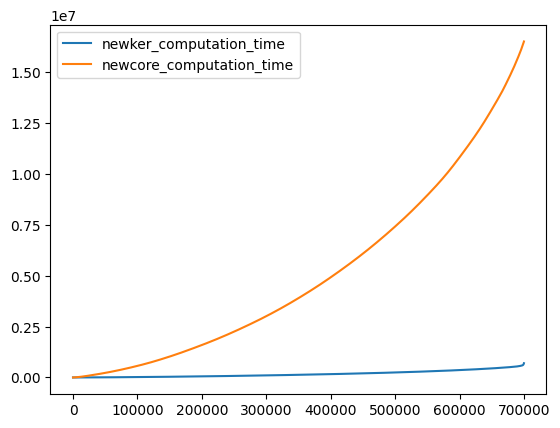

In [135]:
# cactus plot

import matplotlib.pyplot as plt

# create a new figure

plt.figure()


# plot the hundred best values of newker_computation_time

plt.plot(_sums_newker, label='newker_computation_time')

# plot the hundred best values of oldker_computation_time

#plt.plot(_sums_oldker, label='oldker_computation_time')

# plot the hundred best values of newcore_computation_time

plt.plot(_sums_newcore, label='newcore_computation_time')

# add a legend

plt.legend()

# save the figure

save_path = 'plots/cactus_plot.png'

plt.savefig(save_path)


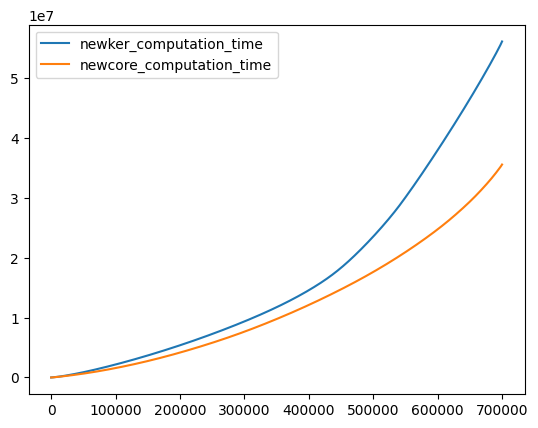

In [136]:
# cactus plot

import matplotlib.pyplot as plt

# create a new figure

plt.figure()


# plot the hundred best values of newker_computation_time

plt.plot(_sums_newker_summary, label='newker_computation_time')

# plot the hundred best values of oldker_computation_time

#plt.plot(_sums_oldker_summary, label='oldker_computation_time')

# plot the hundred best values of newcore_computation_time

plt.plot(_sums_newcore_summary, label='newcore_computation_time')

# add a legend

plt.legend()

# save the figure

save_path = 'plots/cactus_plot_with_summary.png'

plt.savefig(save_path)


In [138]:
# print len of _sorted_summary

print(len(_sorted_summary))

699977


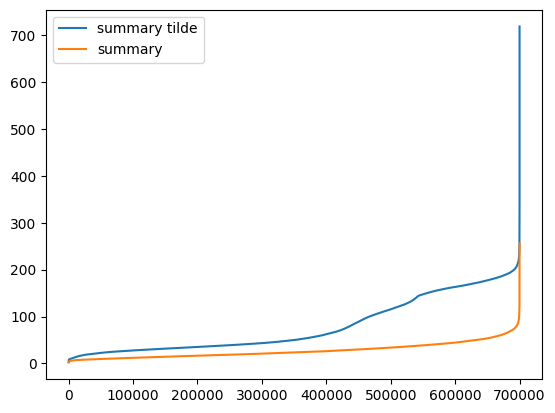

In [139]:
# cactus plot

import matplotlib.pyplot as plt

# create a new figure

plt.figure()

# the x axis is the number of elements in _sorted_summary

x = range(len(_sorted_summary))



# the y goes in log scale





# plot the hundred best values of newker_computation_time

#plt.plot(_sorted_summary, label='summary')

# plot the hundred best values of oldker_computation_time

plt.plot(x,_sorted_tilde, label='summary tilde')
plt.plot(x, _sorted_summary, label='summary')

# add a legend

plt.legend()

# save the figure

save_path = 'plots/cactus_plot_only_summary.png'

plt.savefig(save_path)
